# TELCO CUSTOMER CHURN

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
file_path = r"C:\Users\91958\OneDrive\Desktop\Telco Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = pd.read_csv(file_path)

In [267]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [268]:
df.shape

(7043, 21)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [270]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [271]:
df.duplicated().sum()

np.int64(0)

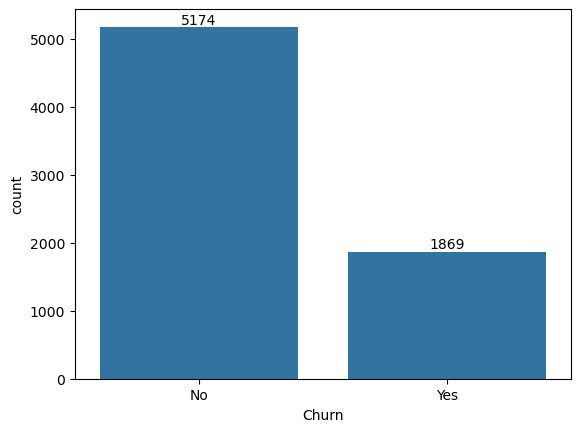

In [272]:
ax = sns.countplot(x='Churn', data = df )
ax.bar_label(ax.containers[0])
plt.show()

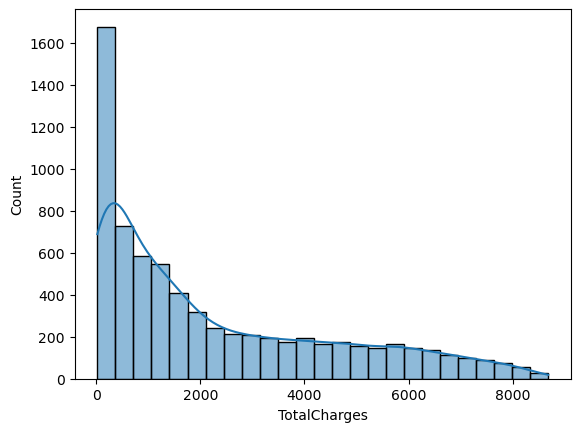

In [273]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges']=df['TotalCharges'].astype(float)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
sns.histplot(df['TotalCharges'],kde=True)
plt.show()

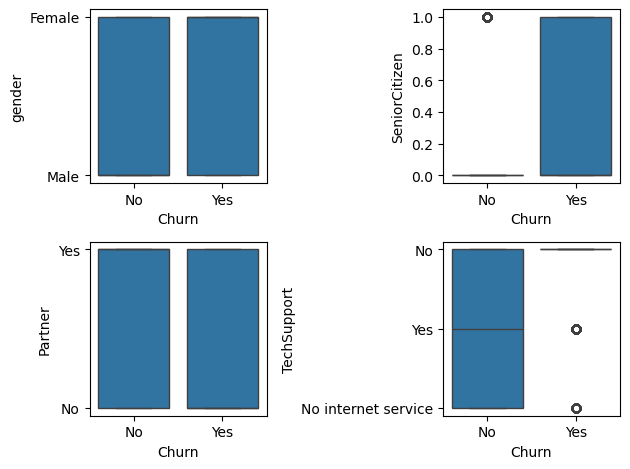

In [274]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.boxplot(x='Churn', y=var, data=df)

plotting('gender',1)
plotting('SeniorCitizen',2)
plotting('Partner',3)
plotting('TechSupport',4)

plt.tight_layout()

In [275]:
df_corr=df.copy()
binary_cols = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaperlessBilling', 'Churn'
]
for i in binary_cols:
    df_corr[i] = df_corr[i].replace({'Yes': 1, 'No': 0})

df_corr['gender']=df_corr['gender'].replace({'Female': 1, 'Male': 0})

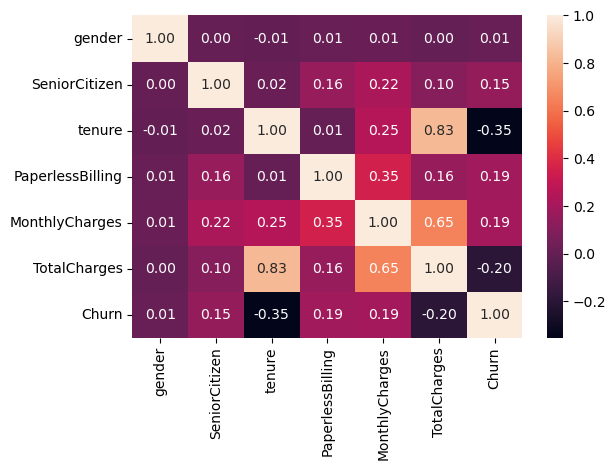

In [276]:
sns.heatmap(df_corr.corr(numeric_only=True),annot=True,fmt=".2f")
plt.tight_layout()

In [277]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [278]:
x.drop('customerID',axis=1,inplace=True)

In [279]:
x_encoded = pd.get_dummies(x,drop_first=True)

In [280]:
x_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,True,False,True,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,False,True,True,True,False,True,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,True,True,False,True,False,True,...,False,False,False,False,False,False,True,False,False,True


In [281]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_encoded_scaled=scaler.fit_transform(x_encoded)


In [282]:
x_encoded_scaled=pd.DataFrame(x_encoded_scaled,columns=x_encoded.columns,index=x_encoded.index)
x_encoded_scaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.994242,-1.009559,1.034530,-0.654012,-3.054010,3.054010,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
1,-0.439916,0.066327,-0.259629,-0.173244,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513
2,-0.439916,-1.236724,-0.362660,-0.959674,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513
3,-0.439916,0.514251,-0.746535,-0.194766,0.990532,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807
4,-0.439916,-1.236724,0.197365,-0.940470,-1.009559,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.128655,0.990532,1.034530,1.529024,0.327438,-0.327438,1.170719,...,-0.525927,1.265612,-0.525927,1.256171,1.944582,-0.562975,0.829798,-0.525047,-0.711026,1.835513
7039,-0.439916,1.613701,1.277533,2.243151,-1.009559,1.034530,1.529024,0.327438,-0.327438,1.170719,...,-0.525927,1.265612,-0.525927,1.256171,1.944582,-0.562975,0.829798,1.904590,-0.711026,-0.544807
7040,-0.439916,-0.870241,-1.168632,-0.854469,-1.009559,1.034530,1.529024,-3.054010,3.054010,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
7041,2.273159,-1.155283,0.320338,-0.872062,0.990532,1.034530,-0.654012,0.327438,-0.327438,1.170719,...,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513


In [283]:
from sklearn.preprocessing import LabelEncoder

In [284]:
le = LabelEncoder()
y_encoded = le.fit_transform(df['Churn'])

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score , confusion_matrix , classification_report
from sklearn.metrics import recall_score

In [286]:
 X_train, X_test, y_train, y_test = train_test_split(
x_encoded_scaled, y_encoded, test_size=0.33, random_state=42, stratify=y_encoded)

In [287]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [288]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,pos_label=1)

In [289]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [290]:
acc

0.8064516129032258

In [291]:
f1

0.6038732394366197

In [292]:
confusion_matrix(y_test,y_pred)

array([[1532,  176],
       [ 274,  343]])

In [293]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1708
           1       0.66      0.56      0.60       617

    accuracy                           0.81      2325
   macro avg       0.75      0.73      0.74      2325
weighted avg       0.80      0.81      0.80      2325



In [294]:
recall_score(y_test, y_pred)

0.5559157212317666

In [295]:
from sklearn.tree import DecisionTreeClassifier

In [296]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [297]:
y_pred_DT=DT_model.predict(X_test)

In [298]:
y_pred_DT

array([0, 0, 0, ..., 0, 1, 0])

In [299]:
accuracy_score(y_test,y_pred_DT)

0.7281720430107527

In [300]:
f1_score(y_test,y_pred_DT,pos_label=1)

0.4886731391585761

In [301]:
confusion_matrix(y_test,y_pred_DT)

array([[1391,  317],
       [ 315,  302]])

In [302]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1708
           1       0.49      0.49      0.49       617

    accuracy                           0.73      2325
   macro avg       0.65      0.65      0.65      2325
weighted avg       0.73      0.73      0.73      2325



In [303]:
recall_score(y_test, y_pred_DT)

0.48946515397082657

In [304]:
from sklearn.model_selection import RandomizedSearchCV

In [305]:
from sklearn.ensemble import RandomForestClassifier

In [306]:
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [307]:
y_pred_RF = model_RF.predict(X_test)

In [308]:
accuracy_score(y_test, y_pred_RF)

0.7836559139784947

In [309]:
f1_score(y_test,y_pred_RF,pos_label=1)

0.5329619312906221

In [310]:
confusion_matrix(y_test,y_pred_RF)

array([[1535,  173],
       [ 330,  287]])

In [311]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1708
           1       0.62      0.47      0.53       617

    accuracy                           0.78      2325
   macro avg       0.72      0.68      0.70      2325
weighted avg       0.77      0.78      0.77      2325



In [312]:
recall_score(y_test, y_pred_RF)

0.4651539708265802

In [313]:
from sklearn.model_selection import RandomizedSearchCV

In [314]:
classifier = RandomizedSearchCV((model_RF), {'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]} , n_iter = 8,  cv=5 ,  n_jobs=-1,  )

In [315]:
classifier.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=8, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [316]:
best_model_RF = classifier.best_estimator_
y_pred_classifier = best_model_RF.predict(X_test)
accuracy_score(y_test,y_pred_classifier)

0.7956989247311828

In [317]:
f1_score(y_test,y_pred_classifier,pos_label=1)

0.5581395348837209

In [318]:
confusion_matrix(y_test,y_pred_classifier)

array([[1550,  158],
       [ 317,  300]])

In [319]:
print(classification_report(y_test,y_pred_classifier))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1708
           1       0.66      0.49      0.56       617

    accuracy                           0.80      2325
   macro avg       0.74      0.70      0.71      2325
weighted avg       0.78      0.80      0.79      2325



In [320]:
recall_score(y_test, y_pred_classifier)

0.4862236628849271

In [321]:
 import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor

In [322]:
model_XGB = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    eval_metric='logloss',
    use_label_encoder=False
)
model_XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [323]:
y_pred_XGB = model_XGB.predict(X_test)
accuracy_score(y_test,y_pred_XGB)

0.7901075268817205

In [324]:
f1_score(y_test,y_pred_XGB,pos_label=1)

0.5587703435804702

In [325]:
confusion_matrix(y_test,y_pred_XGB)

array([[1528,  180],
       [ 308,  309]])

In [326]:
print(classification_report(y_test,y_pred_XGB))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1708
           1       0.63      0.50      0.56       617

    accuracy                           0.79      2325
   macro avg       0.73      0.70      0.71      2325
weighted avg       0.78      0.79      0.78      2325



In [327]:
recall_score(y_test, y_pred_XGB)

0.5008103727714749

In [329]:
model_performance = [
    {'Model': 'Logistic Regression', 
     'Accuracy': accuracy_score(y_test, y_pred),
     'Recall': recall_score(y_test, y_pred, pos_label=1),
     'F1-Score': f1_score(y_test, y_pred, pos_label=1)},
    
    {'Model': 'Decision Tree', 
     'Accuracy': accuracy_score(y_test, y_pred_DT),
     'Recall': recall_score(y_test, y_pred_DT, pos_label=1),
     'F1-Score': f1_score(y_test, y_pred_DT, pos_label=1)},
     
    {'Model': 'Random Forest', 
     'Accuracy': accuracy_score(y_test, y_pred_RF),
     'Recall': recall_score(y_test, y_pred_RF, pos_label=1),
     'F1-Score': f1_score(y_test, y_pred_RF, pos_label=1)},
     
    {'Model': 'XGBoost', 
     'Accuracy': accuracy_score(y_test, y_pred_XGB),
     'Recall': recall_score(y_test, y_pred_XGB, pos_label=1),
     'F1-Score': f1_score(y_test, y_pred_XGB, pos_label=1)}
]

In [330]:
comparison_df = pd.DataFrame(model_performance)
comparison_df

,Model,Accuracy,Recall,F1-Score
0,Logistic Regression,0.806452,0.555916,0.603873
1,Decision Tree,0.728172,0.489465,0.488673
2,Random Forest,0.783656,0.465154,0.532962
3,XGBoost,0.790108,0.500810,0.558770


In [331]:
coefficients = model.coef_[0]

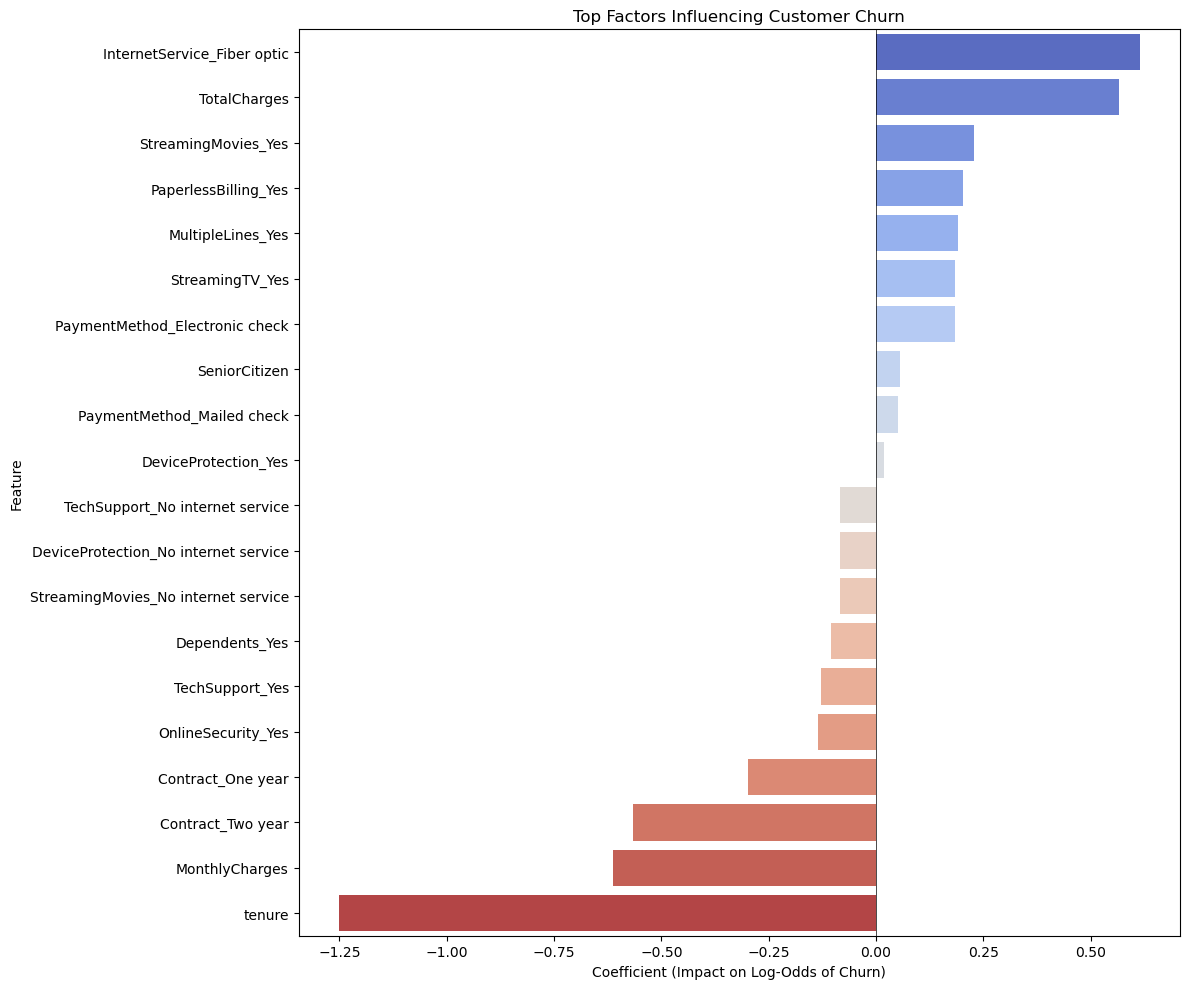

In [335]:
coeff_df = pd.DataFrame({
    'Feature': x_encoded_scaled.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

top_churn_drivers = coeff_df.head(10)
top_retention_drivers = coeff_df.tail(10)

plot_df = pd.concat([top_churn_drivers, top_retention_drivers])

plt.figure(figsize=(12, 10))
sns.barplot(x='Coefficient', y='Feature', data=plot_df, palette='coolwarm')
plt.title('Top Factors Influencing Customer Churn')
plt.xlabel('Coefficient (Impact on Log-Odds of Churn)')
plt.axvline(0, color='black', lw=0.5)
plt.tight_layout()
plt.show()

---
# Final Conclusion & Business Recommendations

## 1. Problem Statement
The goal of this project was to analyze customer data for a telecom provider to identify the key drivers of customer churn. A predictive model was built to identify at-risk customers, enabling the business to implement proactive retention strategies.

---

## 2. Final Model Selection
After evaluating four classification models, the **Logistic Regression model** was selected as the champion. It achieved the best balance of performance and interpretability, with an overall accuracy of **81.7%** and, crucially, the highest **Recall of 59%** for the churn class. 

*Recall was prioritized because it is more costly for the business to fail to identify a potential churner than to accidentally give a retention offer to a loyal customer.*

---

## 3. Key Findings from the Model
The model's coefficients revealed several key factors influencing churn. The chart below visualizes the features with the strongest positive (increases churn) and negative (decreases churn) impacts.

*[Insert your coefficient/feature importance chart here]*

* **Strongest Churn Driver:** The single strongest predictor of churn is being on a **month-to-month contract**.
* **Strongest Retention Drivers:** The most loyal customers are those with long **tenure** and a **two-year contract**.
* **Other Significant Factors:** Having **Fiber Optic internet** and using **electronic checks** for payment also showed a notable correlation with a higher likelihood of churn.

---

## 4. Business Recommendations
Based on these findings, the following actions are recommended:

1.  **Target Month-to-Month Customers:** Launch a targeted campaign for customers on month-to-month contracts, offering a small, one-time discount to upgrade to a one or two-year plan. This directly addresses the biggest churn driver.
2.  **Enhance New Customer Onboarding:** Implement a specialized communication and support program for new customers (low tenure) during their first 90 days to build loyalty and reduce early churn.
3.  **Investigate Fiber Optic Service:** Conduct a review of customer satisfaction related to the Fiber Optic service. Its positive correlation with churn suggests potential issues with price sensitivity or service reliability that need to be addressed.